**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Maria Celeste Madrigal Solorzano


1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
happiness = pd.read_csv('/content/happiness_report.csv', sep=None)
happiness = pd.DataFrame(happiness)
happiness

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [ ]:
mexico = happiness[(happiness['Country or region']=='Mexico')]
mexico.set_index('Country or region',inplace=True)
mexico 

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(6.595, 0, 'Mex')

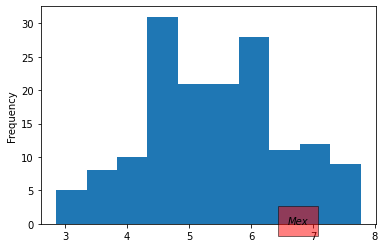

In [ ]:
from pandas import plotting
hist = happiness['Score'].plot.hist()
plt.text(6.595,0, r'Mex',style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

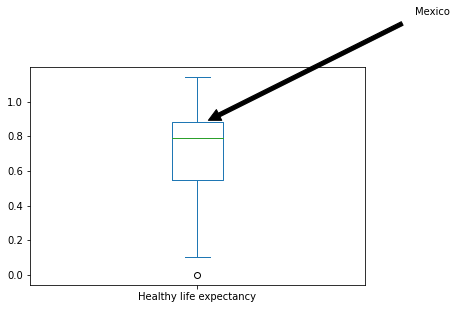

In [ ]:
happiness['Healthy life expectancy'].plot.box()
plt.annotate('Mexico', xy=(1, mexico.loc['Mexico','Healthy life expectancy']), xytext=(1.65, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

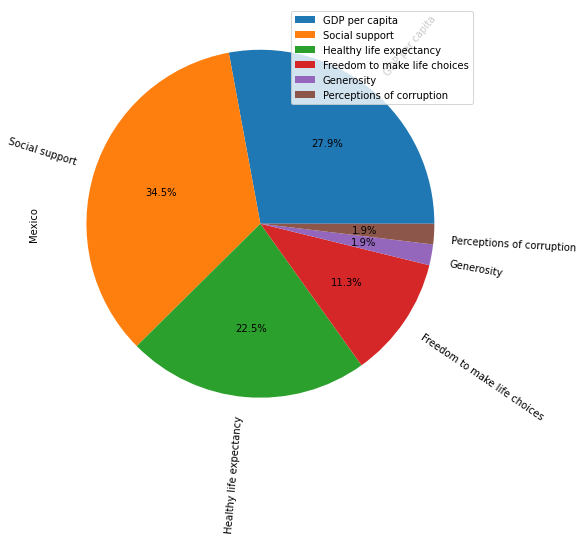

In [ ]:
mexico = happiness[(happiness['Country or region']=='Mexico')]
mexico = mexico.drop('Overall rank',axis=1)
mexico = mexico.drop('Score',axis=1)
mexico.set_index('Country or region',inplace=True)
mexicot = mexico.T
mexicot
mexicot.plot.pie(y='Mexico',labels=mexicot.index,rotatelabels=True,figsize=(8,8),autopct='%1.1f%%')


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

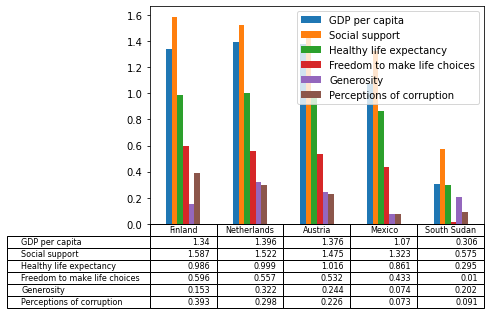

In [ ]:
data_filter = happiness.iloc[[0,4,9,22,155],:]
data_filter = data_filter.drop('Overall rank',axis=1)
data_filter = data_filter.drop('Score',axis=1)
data_filter
data_filter.plot.bar(table=True,xticks=[],xlabel='')


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0.5, 1.0, 'Perceptions of corruption')

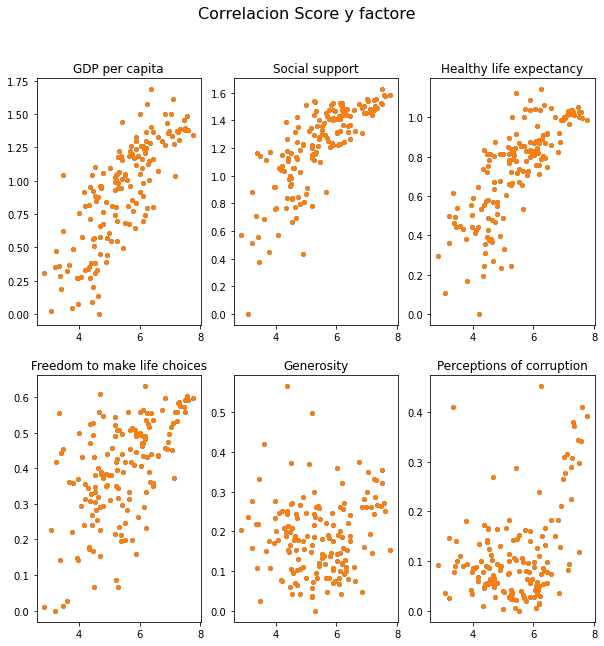

In [92]:
fig,axs = plt.subplots(2,3,figsize=(10,10))
fig.suptitle('Correlacion Score y factore',fontsize=16) 
axs[0, 0].scatter(happiness['Score'],happiness['GDP per capita'], s=60, marker=".")
axs[0, 0].set_title("GDP per capita")
axs[0, 1].scatter(happiness['Score'],happiness['Social support'], s=60, marker=".")
axs[0, 1].set_title("Social support")
axs[0, 2].scatter(happiness['Score'],happiness['Healthy life expectancy'], s=60, marker=".")
axs[0, 2].set_title("Healthy life expectancy")
axs[1, 0].scatter(happiness['Score'],happiness['Freedom to make life choices'], s=60, marker=".")
axs[1, 0].set_title("Freedom to make life choices")
axs[1, 1].scatter(happiness['Score'],happiness['Generosity'], s=60, marker=".")
axs[1, 1].set_title("Generosity")
axs[1, 2].scatter(happiness['Score'],happiness['Perceptions of corruption'], s=60, marker=".")
axs[1, 2].set_title("Perceptions of corruption")
axs[0, 0].scatter(happiness['Score'],happiness['GDP per capita'], s=60, marker=".")
axs[0, 0].set_title("GDP per capita")
axs[0, 1].scatter(happiness['Score'],happiness['Social support'], s=60, marker=".")
axs[0, 1].set_title("Social support")
axs[0, 2].scatter(happiness['Score'],happiness['Healthy life expectancy'], s=60, marker=".")
axs[0, 2].set_title("Healthy life expectancy")
axs[1, 0].scatter(happiness['Score'],happiness['Freedom to make life choices'], s=60, marker=".")
axs[1, 0].set_title("Freedom to make life choices")
axs[1, 1].scatter(happiness['Score'],happiness['Generosity'], s=60, marker=".")
axs[1, 1].set_title("Generosity")
axs[1, 2].scatter(happiness['Score'],happiness['Perceptions of corruption'], s=60, marker=".")
axs[1, 2].set_title("Perceptions of corruption")

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

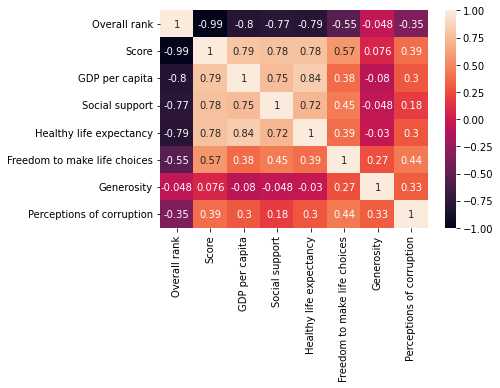

In [94]:
data_filter2 = happiness.drop('Overall rank',axis=1)
data_filter2
heatmap = sns.heatmap(happiness.corr(), vmin=-1, vmax=1, annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

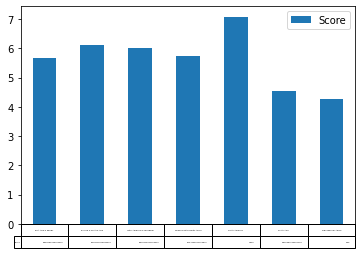

In [103]:
Mentadata = pd.read_csv('/content/Metadata.csv', sep=None)
Mentadata
merged_left = pd.merge(left=Mentadata,right=happiness, how='left', left_on='TableName', right_on='Country or region')
group = merged_left.groupby(['Region']).mean()[['Score']]
group
group.plot.bar(table=True,xticks=[],xlabel='')
plt.xticks(rotation=90)
